**Reference**
- Introduction to Machine Learning with Python, Andreas Muller et al. 
 - Github link : https://github.com/amueller/introduction_to_ml_with_python
 - git clone and study with them if you want
---
- **mglearn**
 - not a commonly used library. You don't have to study this library. Just see.
 - contains some utility functions to draw graph for explaination

 > pip install mglearn

- **Others**

 > conda install graphviz python-graphviz
 - These are not contained in 'Anaconda' so you have to install manually

In [1]:
# import some basic library for the class
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

## Decision trees

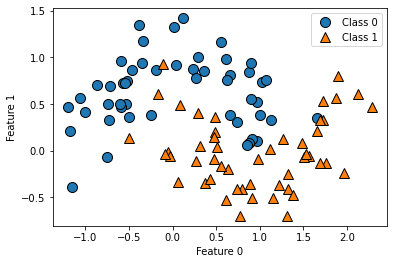

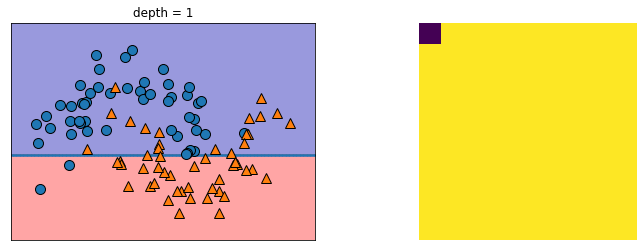

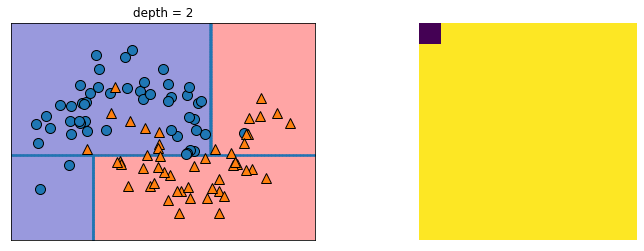

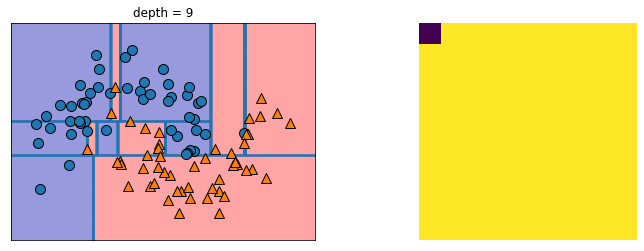

In [4]:
# remind how the DT works
# 깊이가 깊어질수록 분류가 더 잘됨을 확인할 수 있음

mglearn.plots.plot_tree_progressive()

##### DecisionTreeClassifier

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [6]:
#  we can load the dataset with this code:  breast_cancer dataset
cancer = load_breast_cancer() # several famous datasets are offered by sklearn

https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset
- target variable (class) : malignant(악성) or benign(양성)
- classification problem

#### Look at Your Data (EDA)
- You can use spotfire.
- Still, you should know basic usage of matplotlib.
- This is just a simple and famous dataset. When dealing with real-world dataset, you need to do a lot of **EDA & preprocessing**
- For the most projects, preprocessing is the harshest step. You may feel it as the project progresses. 

In [7]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
cancer.data.shape # check the number of instances and variables

(569, 30)

In [9]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
# class distribution
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

#### train/test split
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Googling
- main arguments:
    - test_size(입력된 데이터의 세트를 0.2이면 20%를 테스트 세트로 나눈다는 것)
    - random_states(호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값, 지정하지 않으면 호출할 때마다 다른 학습/테스트용 데이터 생성)
    - shuffle(False로 설정하면 기존 데이터 셋 내에서 순서를 기반으로 학습/데이터 셋을 분리함)
    - stratify(class 라벨이 들어있는 열로 지정)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#### DecisionTreeClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
- main arguments:
    - criterion, max_depth, min_samples_leaf, ...
    - Please also check other arguments.

In [14]:
# model training with labeled training data
clf = DecisionTreeClassifier(random_state=0) # change some arguments for practicing
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
# prediction
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

In [16]:
# evaluation
from sklearn.metrics import accuracy_score
print("Accuracy on training set: ", accuracy_score(y_train, y_train_hat))
print("Accuracy on testing set: ", accuracy_score(y_test, y_test_hat))

Accuracy on training set:  1.0
Accuracy on testing set:  0.9370629370629371


- DT was fully grown and hit all the training instances.
- But there exists errors for the test set. overfitting or underfitting?

#### varying the hyperparameter

In [17]:
# same as before
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

- Let's change the hyperparameters and store the results in lists.
    - hyperparameter to be changed : min_samples_leaf
    - Think about
        - setting to a lower value will results in *[overfitting or underfitting ?]*

In [18]:
training_accuracy = []
test_accuracy = []

msl_settings = [1, 2, 5, 7, 10, 20] # code will iterate over these six settings with the for statement
for msl in msl_settings:
    # model training with labeled training data
#     이 부분의 파라미터를 바꿈
    clf = DecisionTreeClassifier(min_samples_leaf= msl, random_state=0) # it repeats by changing only this msl
    clf.fit(X_train, y_train)

    # prediction
    y_train_hat = clf.predict(X_train)
    y_test_hat = clf.predict(X_test)

    # evaluation. / in every iteration, store the results. 
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

In [19]:
# check the result (using pd.DataFrame to make a neat table)
result = pd.DataFrame({"min_samples_leaf":msl_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})

In [20]:
result # among these results, what do you think is the best result?

,min_samples_leaf,training accuracy,test accuracy
0,1,1.000000,0.937063
1,2,0.990610,0.937063
2,5,0.976526,0.937063
3,7,0.962441,0.951049
4,10,0.962441,0.951049
5,20,0.946009,0.916084


- **Practice**
    - Do the same for *max_depth*.

In [24]:
'''TODO'''

training_accuracy = []
test_accuracy = []

max_depth = [1, 2, 5, 7, 10, 20] # code will iterate over these six settings with the for statement
for depth in max_depth:
    # model training with labeled training data
#     이 부분의 파라미터를 바꿈
    clf = DecisionTreeClassifier(max_depth= depth, random_state=0) # it repeats by changing only this msl
    clf.fit(X_train, y_train)

    # prediction
    y_train_hat = clf.predict(X_train)
    y_test_hat = clf.predict(X_test)

    # evaluation. / in every iteration, store the results. 
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    test_accuracy.append(accuracy_score(y_test, y_test_hat))
    

# check the result (using pd.DataFrame to make a neat table)
result = pd.DataFrame({"max_depth":max_depth, "training accuracy": training_accuracy, "test accuracy": test_accuracy})

result # among these results, what do you think is the best result?

,max_depth,training accuracy,test accuracy
0,1,0.922535,0.923077
1,2,0.957746,0.909091
2,5,0.995305,0.951049
3,7,1.000000,0.937063
4,10,1.000000,0.937063
5,20,1.000000,0.937063


#### Visualizing Decision Trees

In [25]:
clf = DecisionTreeClassifier(min_samples_leaf= 10, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=0)

[Text(0.5769230769230769, 0.9166666666666666, 'X[20] <= 16.795\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.38461538461538464, 0.75, 'X[27] <= 0.136\ngini = 0.161\nsamples = 284\nvalue = [25, 259]'),
 Text(0.23076923076923078, 0.5833333333333334, 'X[10] <= 0.524\ngini = 0.031\nsamples = 252\nvalue = [4, 248]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[21] <= 29.985\ngini = 0.016\nsamples = 242\nvalue = [2, 240]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 211\nvalue = [0, 211]'),
 Text(0.23076923076923078, 0.25, 'X[26] <= 0.204\ngini = 0.121\nsamples = 31\nvalue = [2, 29]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.3076923076923077, 0.4166666666666667, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.5384615384615384, 0.5833333333333334, 'X[21] <= 25.62\ngini = 0.451\nsamples = 32\nvalue = [2

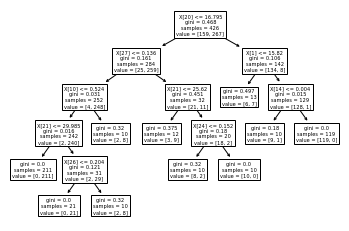

In [26]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(clf)

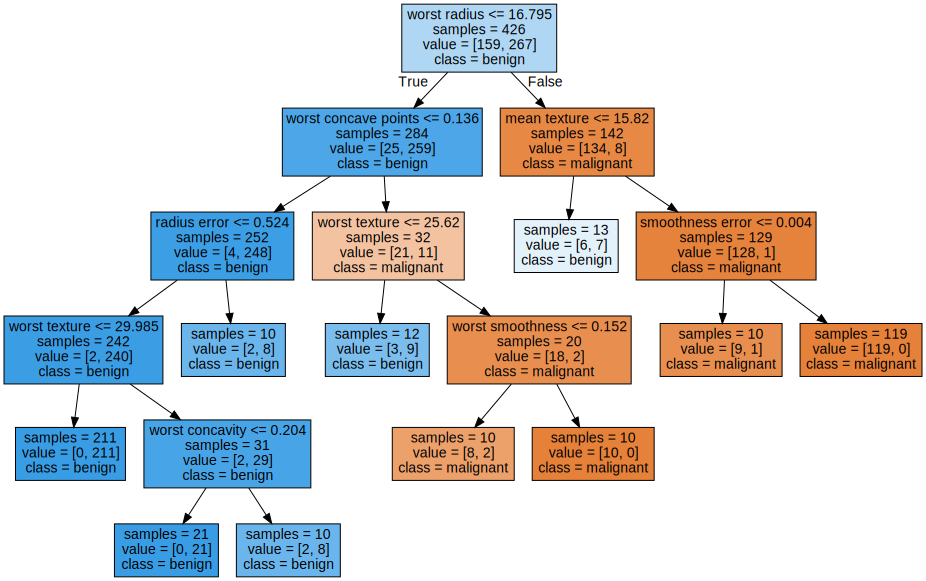

In [41]:
# 에러해결 : conda install python-graphviz

from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature Importance in trees
- feature importance summarizes the workings of a tree by rating how important each feature is for the decision the tree makes.
    - The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
        - ex) If a feature cannot make any split, its importance goes to zero.
    - It has a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.”
    
- feature_importances_ 란
    - 전처리된 데이터를 통해 학습된 모델이 어떤 변수에 가중치를 두어 값이 예측됐는지 시각적으로 파악할 수 있는 메서드.
    - 사용법 : 낮은 값의 인덱스를 제거하면 성능을 최적화 시킬 수 있음

In [42]:
print("Feature importances:")
print(clf.feature_importances_)

Feature importances:
[0.         0.03759604 0.         0.         0.         0.
 0.         0.         0.         0.         0.00399028 0.
 0.         0.         0.00104266 0.         0.         0.
 0.         0.         0.78335118 0.03708714 0.         0.
 0.00226055 0.         0.00306268 0.13160948 0.         0.        ]


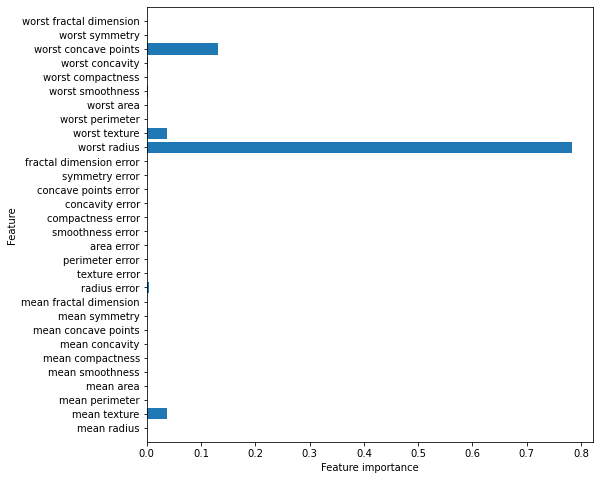

In [46]:
# let's visualize it
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(8,8))
plot_feature_importances_cancer(clf)

It does not provide directional information about which class the feature supports.
- higher value of worst radius makes the predictions more positive ? 
- worst radius 라는 특성이 중요한 특성임을 암시하지만, 양성인지 악성인지 확답을 줄 순 없음

Feature importances: [0. 1.]


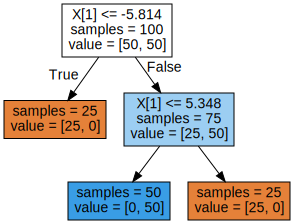

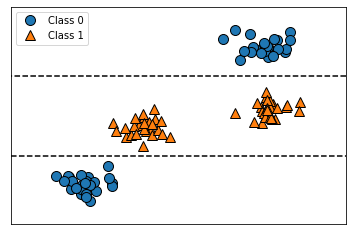

In [47]:
# typical example to show this
# The direction in each split is different. But both only reduce impurity.
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Strengths
- Decision trees work well when you have a mix of continuous and categorical features.
- The algorithms are completely invariant to scaling of the data. (no data scaling is needed)
- Feature selection & reduction is automatic.
- It is robust to noise.
- The resulting model can easily be visualized and understood.

Weaknesses
- They are prone to overfiting.
 - the ensemble methods are usually used in place of a single decision tree.(You will learn it later in class)
- It does not take into account interactions between features.
 - it can only split horizontally on each axis.
- Space of possible decision trees is exponentially large. Greedy approaches are often unable to find the optimal tree.

## Linear Models

#### Linear regression aka ordinary least squares

In [48]:
# wave 데이터셋
# 회귀 알고리즘 설명하려고 인위적으로 만든 데이터셋

X, y = mglearn.datasets.make_wave(n_samples=60)

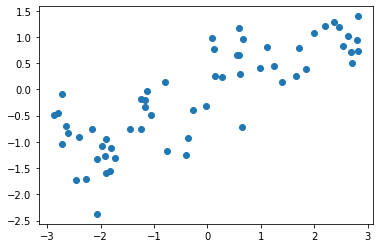

In [49]:
plt.scatter(X, y)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Generally, there are no hyperparameters to be set

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [52]:
# check the learned parameters
print("lr.coef_:", lr.coef_) # this is w1
print("lr.intercept_:", lr.intercept_) # this is w0 = b

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


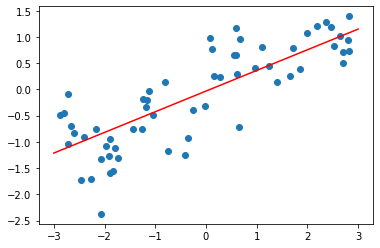

In [53]:
# y= -0.0318 + 0.3939x
plt.scatter(X, y)
x_points = range(-3,4)
plt.plot(x_points, lr.coef_*x_points + lr.intercept_, c='red' )

In [54]:
y_train_hat = lr.predict(X_train)
print(y_train)
print(y_train_hat)

[ 0.26134393  0.29262945 -0.70117304 -1.7113156  -1.32035898  1.19812891
 -0.74646948  0.95081838 -1.03731593  0.79900059 -1.7240941  -0.94575843
  0.97923163  0.44971554 -0.72142625 -1.11948406 -0.32691082 -0.38575444
  0.82614241  1.39515571 -0.83684971  1.28948157 -0.32309571 -0.9139074
 -0.08137001 -0.75150632  0.50015912 -0.75240909  0.13772889  0.77613985
 -0.93416482  0.38109799  0.13368988 -1.58831973 -0.48647165 -0.17851354
 -1.25635546 -0.49131681  0.96250584  1.20319981 -0.44713127 -1.27708305
  0.65823236  0.25092544  0.81263817]
[ 0.02670583  0.20717424 -1.07624425 -0.92509177 -0.84478135  0.93559713
 -0.52522035  1.06868591 -1.10662932  0.64219002 -1.00437487 -0.78005667
  0.0018378   0.45996132  0.22237074 -0.74160533 -0.49446475 -0.13563001
  0.96526728  1.07879625 -1.05977589  0.90134377 -0.04320339 -0.98267947
 -1.10373854 -0.60191177  1.03342886 -0.88383656  0.51649787  0.01562509
 -0.17324993  0.69707222 -0.34764921 -0.77662982 -1.16487092 -0.5230566
 -0.19264775 -0

In [55]:
y_test_hat = lr.predict(X_test)
print(y_test)
print(y_test_hat)

[-1.18073311 -2.37364735 -0.19612826  0.40012342 -1.30838148  0.65213403
  0.70945882  0.23938228  1.0738403  -1.54664568 -0.02565504  0.73141352
 -1.0767626   1.17396178  1.01581268]
[-0.3283204  -0.84483835 -0.49358667  0.35230624 -0.71167167  0.19957573
  1.02910669  0.07859229  0.75390167 -0.75032857 -0.47681266  1.07802761
 -0.8104986   0.2013684   1.00692209]


In [56]:
from sklearn.metrics import mean_absolute_error

print('performance for TRAIN--------')
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))

print('performance for TEST--------')
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))

performance for TRAIN--------
train MAE :  0.41817049416555185
performance for TEST--------
test MAE :  0.4945319104199026


### Logistic Regression for multiclass classification
Naturally, linear models are for binary classification only. Common techniques to extend a binary classification algorithm to a multi-class (c classes) classification algorithm are the one-vs.-rest approach and one-vs.-one approach.

- **One-vs.-Rest (OVR) Approach**
 - A model is learned for each class that tries to separate that class from all of the other classes -> c models  
 - To make a prediction, all models are run on a test point. The model that has the highest score on its single class “wins,” and this class label is returned as the prediction.

- **One-vs.-One (OVO) Approach**
 - A model is learned for each class pair -> c(c-1)/2 models   
 - To make a prediction, the class label of a test data point is predicted based on majority voting by all models.

- **Multinomial logistic regression** 
 - (a.k.a., Softmax regression)

- Multinomial is used as default in sklearn
- But lets try to implement OVR ourselves for practice. 

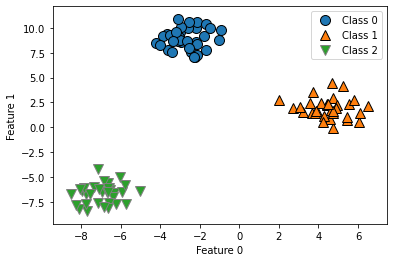

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [60]:
# train a model for [class 0 vs Rest]
'''TODO'''




array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

In [ ]:
# train a model for [class 1 vs Rest]
'''TODO'''



In [ ]:
# train a model for [class 2 vs Rest]
'''TODO'''



In [ ]:
# Apply three models on the testdata and get the score(probability of positive) for each model
'''TODO'''



In [ ]:
# get y_test_hat (=Find a class of the highest score(probability))
'''TODO'''



In [ ]:
# get accuracy_score
'''TODO'''



Let's check whether we did well

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='ovr')
clf.fit(X_train, y_train)

In [ ]:
y_test_hat = clf.predict(X_test)
print(y_test_hat)

In [ ]:
print(accuracy_score(y_test, y_test_hat))

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(clf.coef_, clf.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

**Strengths**
- Linear models are very fast to train, and also fast to predict.
- They scale to very large datasets and work well with sparse data.
- They make it relatively easy to understand how a prediction is made.

**Weaknesses**
- If your dataset has highly correlated features, it is often not entirely clear why coefficients are the way they are. (It is important to remove redundant features –feature selection)
- They would perform worse if the relationship between features and target in your dataset is non-linear.